<a href="https://colab.research.google.com/github/samarakoon-ryan/machinelearningCS5262/blob/main/week1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS5262 - Machine Learning Project




## Background

Outer Space is vast and the number of foreign objects in space is infinite. The distances in space are numbers we cannot fathom, but NASA considers objects within 70,000 Km of Earth as Nearest Earth Objects. These objects or asteroids can be dangerous to Earth and NASA constantly monitors various parameters of these asteroids. Considering the large amount of data available on the current nearest earth objects, it would be useful to use the various parameters of these data to predict whether a nearest earth object is of any concern to Earth.

## Project Description

The NASA Nearest Earth Objects dataset includes over 90,000 datapoints on asteroids. These datapoints include distance, velocity, magnitude, and diameter among other things. All datapoints are also labeled with a boolean value for whether the asteroid is considered hazardous to Earth or not. After some cleaning and feature engineering, I plan to use 10,000 datapoints as a training dataset and another 10,000 datapoints as the test dataset. The test dataset will not include the "hazardous" column as this is what I'll be planning to predict based on the other columns.

Dataset Source - https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects


### Basic Exploratory Data Analysis

1. What is the relationship between hazardousness and relative velocity?
2. What is the relationship between hazardousness and absolute magnitude?
3. What is the distribution of the size of nearest Earth objects?
    - Are there any significant outliers?
4. What is the relationship between relative velocity and absolute magnitude?

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
# load dataset
neos = pd.read_csv("neo.csv")

# display head
neos.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [10]:
# display descriptive statistics for valid columns
neos.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [11]:
# display column info
neos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


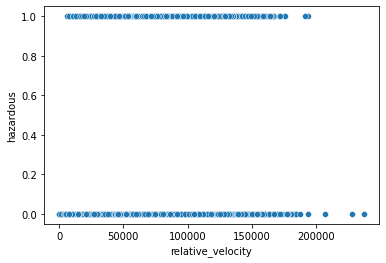

In [41]:
# plot hazardousness and relative velocity
sns.scatterplot(data=neos, x='relative_velocity', y='hazardous')

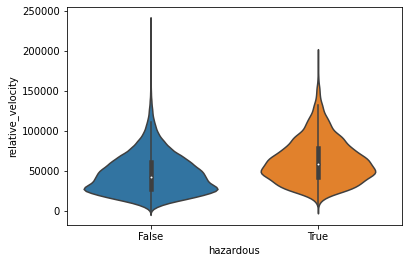

In [39]:
sns.violinplot(data=neos, y='relative_velocity', x='hazardous')

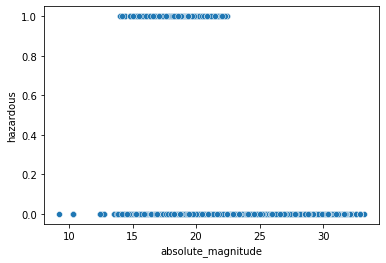

In [43]:
# plot hazardousness and absolute magnitude
sns.scatterplot(data=neos, x='absolute_magnitude', y='hazardous')

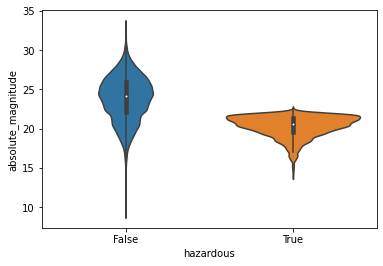

In [37]:
sns.violinplot(data=neos, y='absolute_magnitude', x='hazardous')

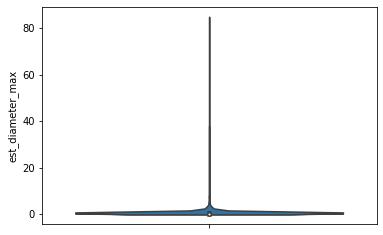

In [22]:
# Visualize distribution of NEO min size
sns.violinplot(data=neos, y='est_diameter_min')

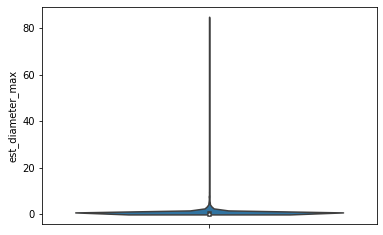

In [23]:
# Visualize distribution of NEO max size
sns.violinplot(data=neos, y='est_diameter_max')

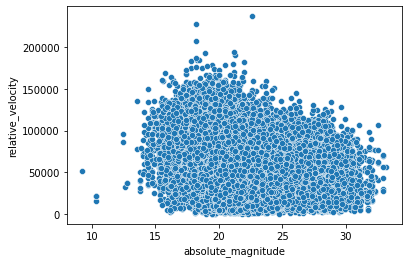

In [35]:
# plot relative velocity and absolute magnitude
sns.scatterplot(x=neos['absolute_magnitude'], y=neos['relative_velocity'])

## Performance Metrics

Given that I'll have the correct "hazardous" labels for the test dataset, I'll be able to see the accuracy of the model very clearly. Simply put, if the values match the prediction will be considered correct. Considering that I have over 90,000 datapoints available to use I may also increase the training and test dataset sizes if I see that I don't have enough data to make an accurate prediction but I hope to only need 10,000 for each dataset.